In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading dataset
df=pd.read_csv("/content/diamonds_new.csv")
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
df.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [5]:
df.shape

(53940, 9)

In [6]:
df.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [8]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

## **EDA**

In [9]:
df.nunique()

carat          273
cut              5
color            7
clarity          8
table          127
x              554
y              552
z              376
price_new    11602
dtype: int64

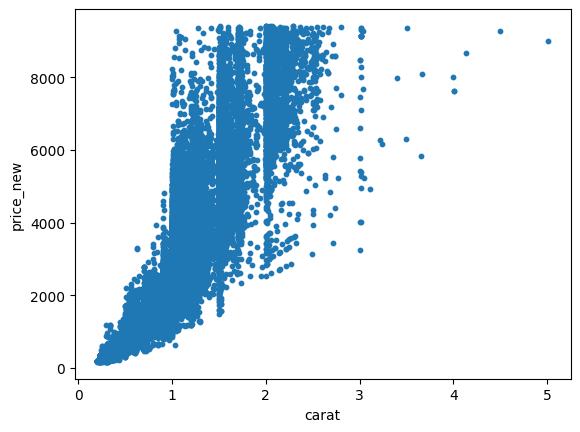

In [10]:
plt.scatter(df['carat'],df['price_new'],s=10)
plt.xlabel("carat")
plt.ylabel("price_new")
plt.show()

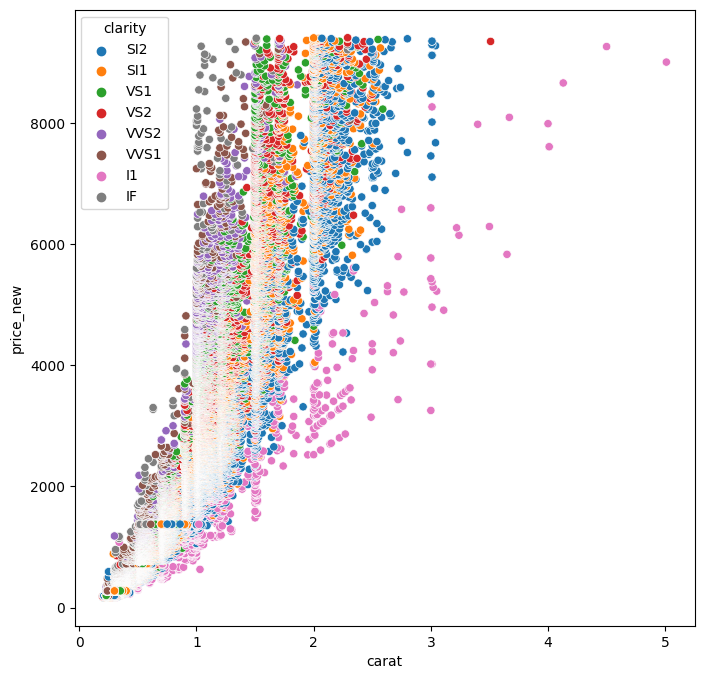

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="carat",y="price_new",hue="clarity")
plt.show()

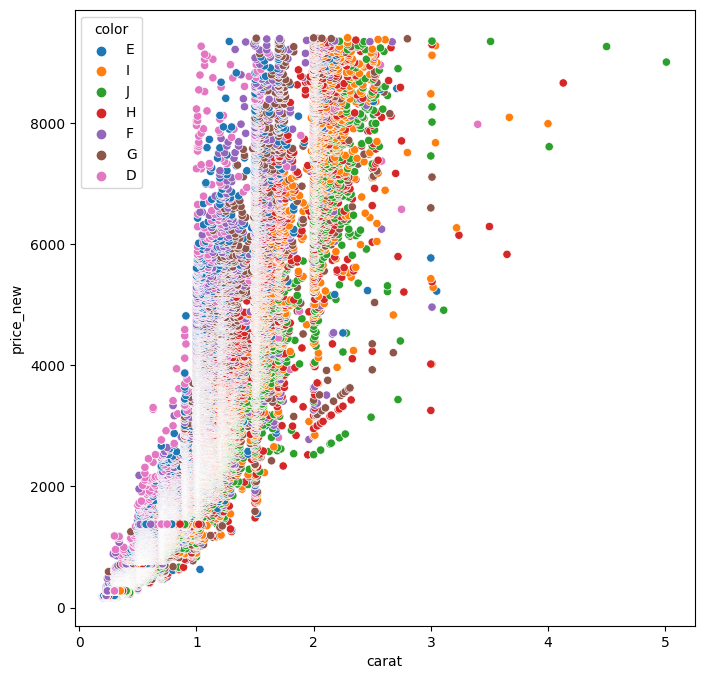

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="carat",y="price_new",hue="color")
plt.show()

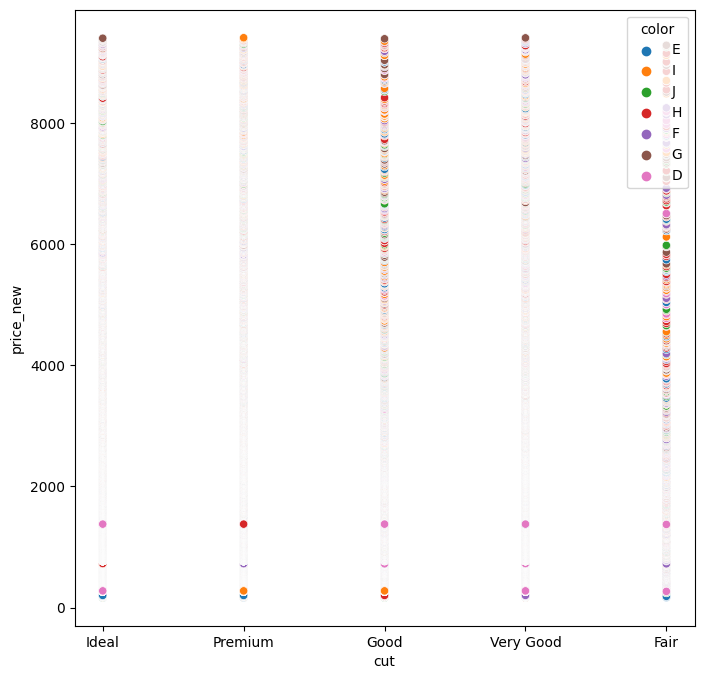

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x="cut",y="price_new",hue="color")
plt.show()

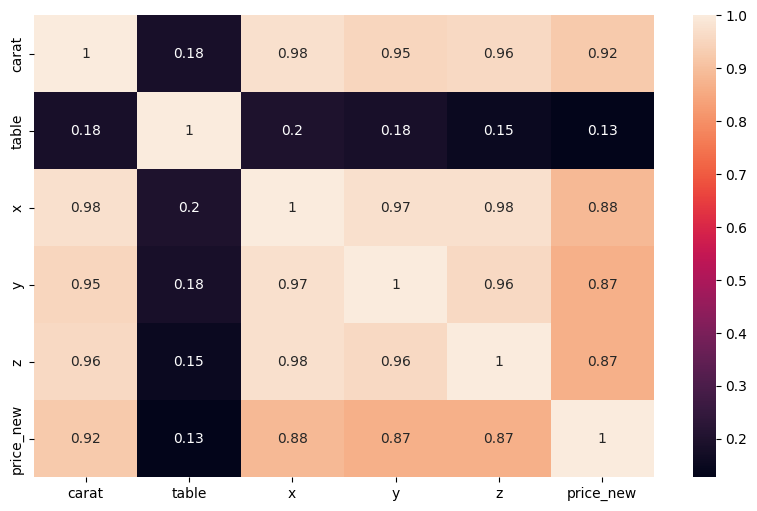

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Handling Missing values**

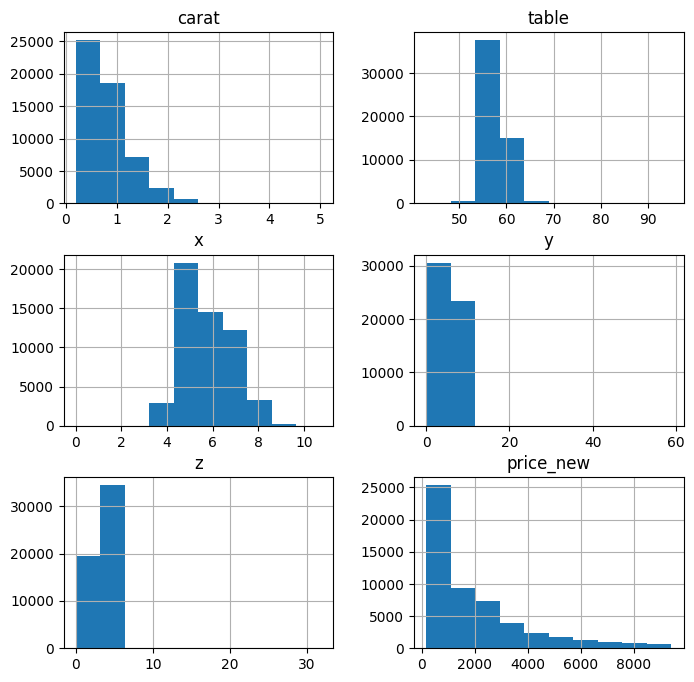

In [15]:
df.hist(figsize=(8,8))
plt.show()

In [16]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

Missing values are identified in carat,color,table

In [17]:
df['color']=df['color'].fillna(df['color'].mode()[0])

In [18]:
for i in ['carat','table']:
  df[i].fillna(df.groupby(["cut",'color','clarity'])[i].transform('median'),inplace=True)

In [19]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [20]:
df.describe()

,carat,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797986,57.457119,5.731157,5.734526,3.539635,1966.399861
std,0.474099,2.234808,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


We find that the min value for x,y,z is 0 in the given data set which cannot be true.Therefore we will replace 0 with median of corresponding features

In [21]:
for i in ["x",'y','z']:
  df[i] = df[i].mask(df[i] == 0).fillna(df.groupby(["cut",'color','clarity'])[i].transform('median'))

In [22]:
df.describe()

,carat,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797986,57.457119,5.732043,5.735298,3.540185,1966.399861
std,0.474099,2.234808,1.119613,1.140289,0.702564,1994.719869
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


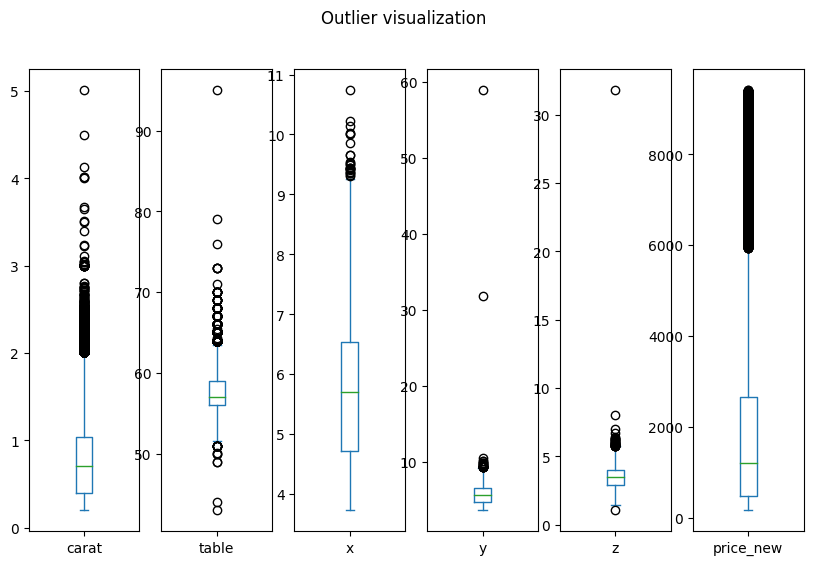

In [23]:
df.plot(kind="box",subplots=True,figsize=(10,6),title="Outlier visualization")
plt.show()

We have identified the presence of outliers in the data set

# Handling Outliers

In [24]:
  #using  square root and log transformation
  df1=df.copy()
  df2=df.copy()

In [25]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [26]:
features=['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z','price_new']

In [27]:
#using square root
for x in features:
  df1["x"]=df1['x']**0.5


In [28]:
df.skew()

carat        1.115702
table        0.796530
x            0.398394
y            2.460490
z            1.584451
price_new    1.618395
dtype: float64

In [29]:
df1.skew()

carat        1.115702
table        0.796530
x            0.105336
y            2.460490
z            1.584451
price_new    1.618395
dtype: float64

In [30]:
df.kurtosis()

carat         1.253279
table         2.798807
x            -0.702905
y            91.736421
z            47.736106
price_new     2.177696
dtype: float64

In [31]:
df1.kurtosis()

carat         1.253279
table         2.798807
x            -1.044576
y            91.736421
z            47.736106
price_new     2.177696
dtype: float64

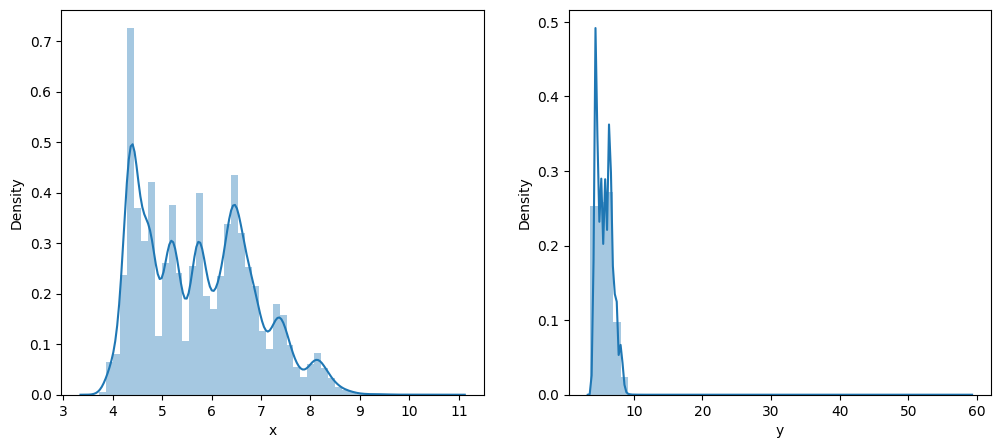

In [32]:
fig,axes=plt.subplots(1,2, figsize=(12,5))
sns.distplot(df['x'],ax=axes[0])
sns.distplot(df['y'],ax=axes[1])
plt.show()

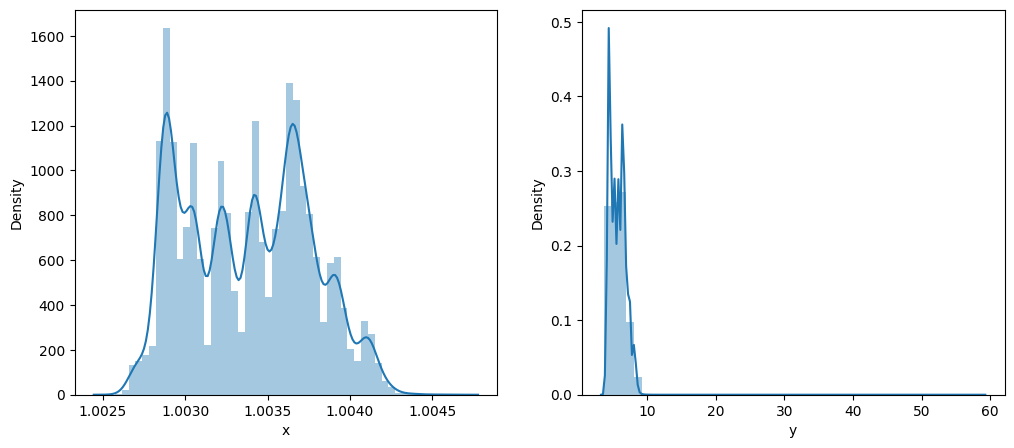

In [33]:
fig,axes=plt.subplots(1,2, figsize=(12,5))
sns.distplot(df1['x'],ax=axes[0])
sns.distplot(df1['y'],ax=axes[1])
plt.show()

In [34]:
#using log transformation
for x in features:
  df2['x']=np.log(df2['x'])

In [35]:
df.skew(),df2.skew()

(carat        1.115702
 table        0.796530
 x            0.398394
 y            2.460490
 z            1.584451
 price_new    1.618395
 dtype: float64,
 carat        1.115702
 table        0.796530
 x                 NaN
 y            2.460490
 z            1.584451
 price_new    1.618395
 dtype: float64)

In [36]:
df.kurtosis(),df2.kurtosis()

(carat         1.253279
 table         2.798807
 x            -0.702905
 y            91.736421
 z            47.736106
 price_new     2.177696
 dtype: float64,
 carat         1.253279
 table         2.798807
 x                  NaN
 y            91.736421
 z            47.736106
 price_new     2.177696
 dtype: float64)

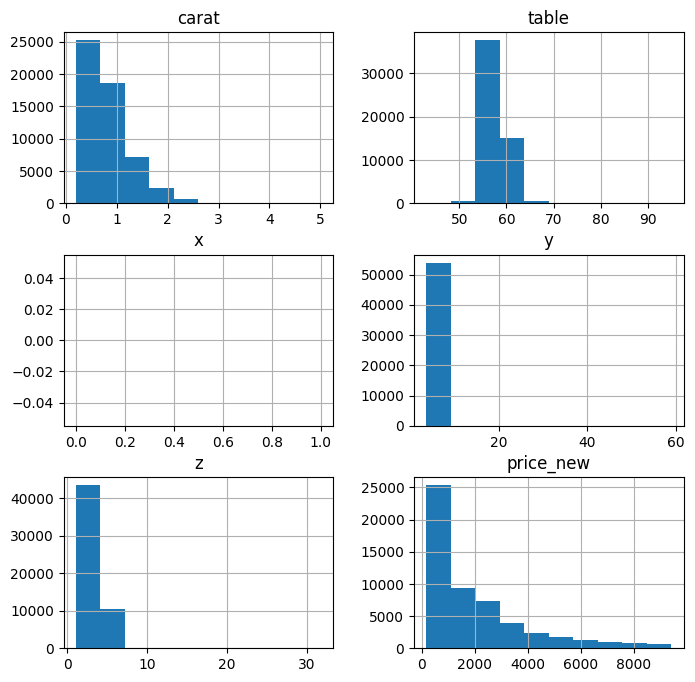

In [37]:
df2.hist(figsize=(8,8))
plt.show()

since we could not get a distribution in both the transformation methods we will use capping methods to handle the outliers

-0.5599999999999999 2.0


1889

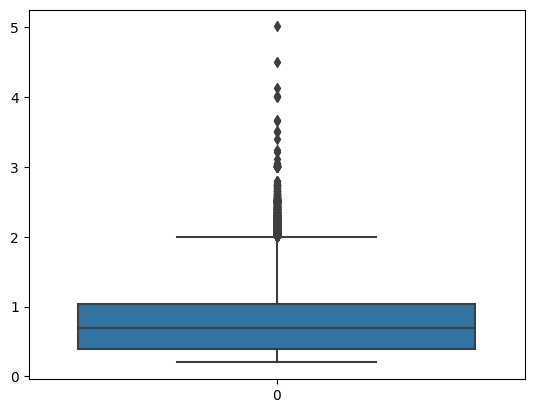

In [38]:
#using capping method
#IQR METHOD

#Handling outliers in Carat
sns.boxplot(df['carat'])
plt.show

Q1=np.percentile(df['carat'],25,interpolation='midpoint')
Q3=np.percentile(df['carat'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l1=[]
for i in df['carat']:
    if (i>Max)or(i<Min):
        l1.append(i)
len(l1)

In [39]:
for i in df['carat']:
    if (i<Min)or(i>Max):
        df['carat'].replace(i,df['carat'].median(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

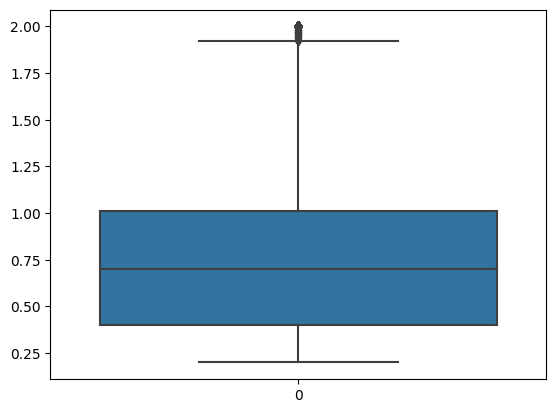

In [40]:
sns.boxplot(df['carat'])
plt.show

51.5 63.5


605

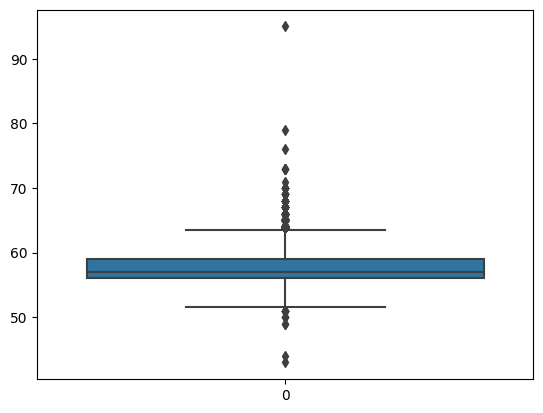

In [41]:
#Handling outliers in table
sns.boxplot(df['table'])
plt.show

Q1=np.percentile(df['table'],25,interpolation='midpoint')
Q3=np.percentile(df['table'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l2=[]
for i in df['table']:
    if (i>Max)or(i<Min):
        l2.append(i)
len(l2)

In [42]:
for i in df['table']:
    if (i<Min)or(i>Max):
        df['table'].replace(i,df['table'].median(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

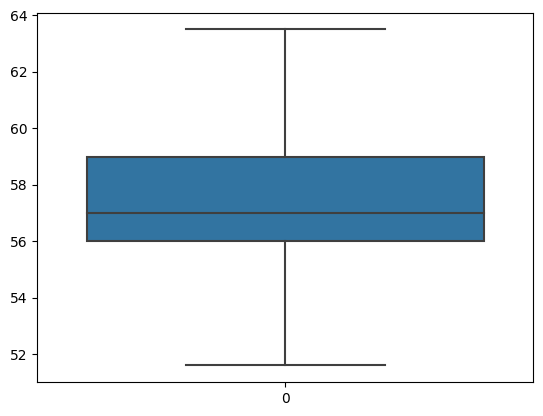

In [43]:
sns.boxplot(df['table'])
plt.show

In [44]:
df.shape

(53940, 9)

1.9649999999999999 9.285


24

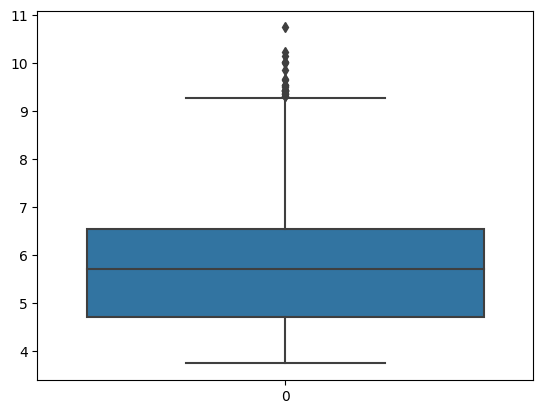

In [45]:
#Handling outliers of x

sns.boxplot(df['x'])
plt.show

Q1=np.percentile(df['x'],25,interpolation='midpoint')
Q3=np.percentile(df['x'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l3=[]
for i in df['x']:
    if (i>Max)or(i<Min):
        l3.append(i)
len(l3)

In [46]:
for i in df['x']:
    if (i<Min)or(i>Max):
        df['x'].replace(i,df['x'].median(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

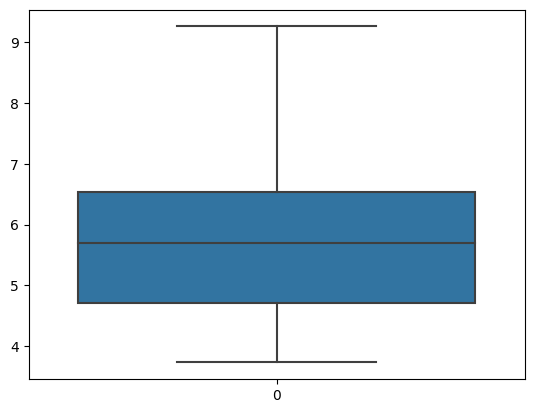

In [47]:
sns.boxplot(df['x'])
plt.show

1.9899999999999993 9.27


22

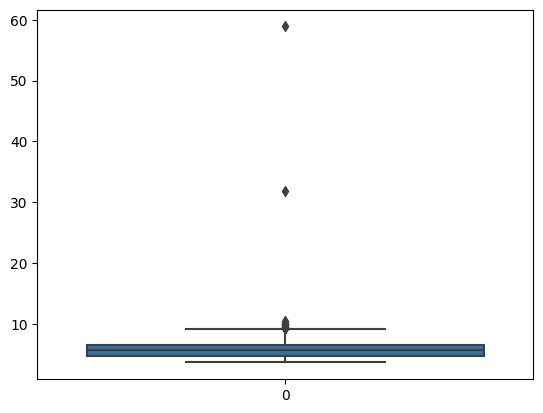

In [48]:
#Handling outliers of y

sns.boxplot(df['y'])
plt.show

Q1=np.percentile(df['y'],25,interpolation='midpoint')
Q3=np.percentile(df['y'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l4=[]
for i in df['y']:
    if (i>Max)or(i<Min):
        l4.append(i)
len(l4)

In [49]:
for i in df['y']:
    if (i<Min)or(i>Max):
        df['y'].replace(i,df['y'].median(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

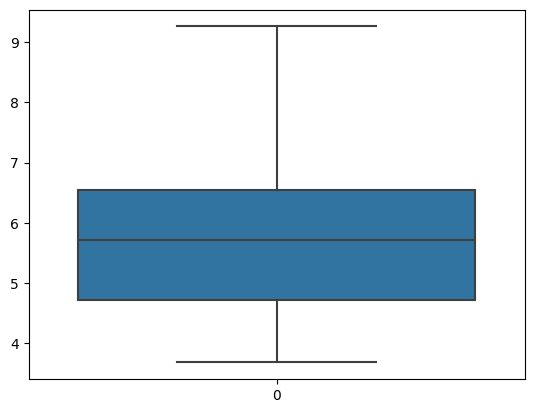

In [50]:
sns.boxplot(df['y'])
plt.show

In [51]:
df.shape

(53940, 9)

1.2150000000000003 5.734999999999999


29

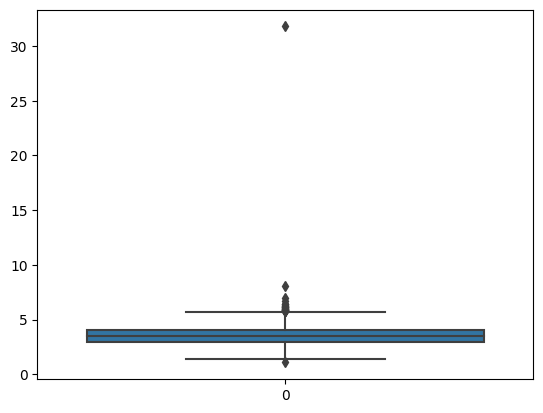

In [52]:
#Handling outliers of z

sns.boxplot(df['z'])
plt.show

Q1=np.percentile(df['z'],25,interpolation='midpoint')
Q3=np.percentile(df['z'],75,interpolation='midpoint')
IQR=Q3-Q1
Max=Q3+(1.5*IQR)
Min=Q1-(1.5*IQR)
print(Min,Max)
l5=[]
for i in df['z']:
    if (i>Max)or(i<Min):
        l5.append(i)
len(l5)

In [53]:
for i in df['z']:
    if (i<Min)or(i>Max):
        df['z'].replace(i,df['z'].median(),inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

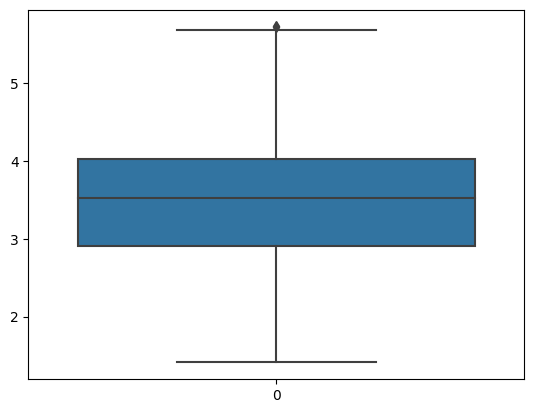

In [54]:
sns.boxplot(df['z'])
plt.show

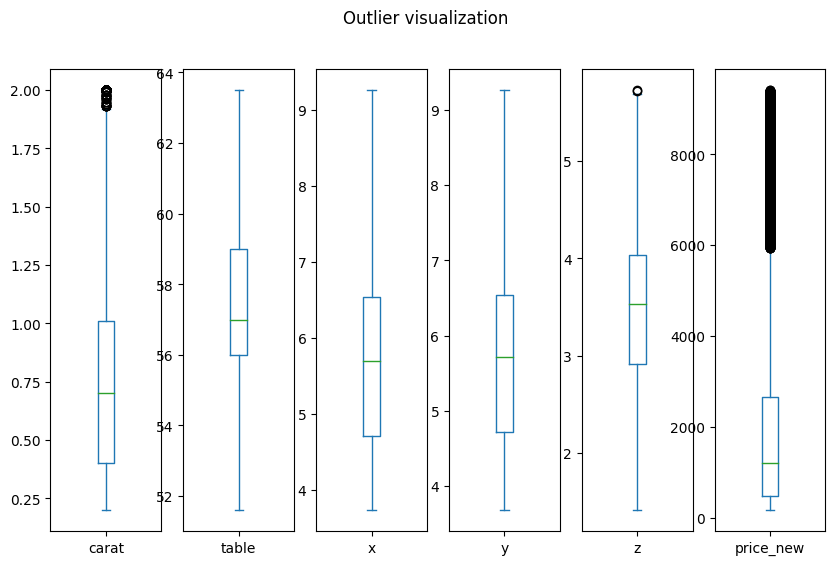

In [55]:
df.plot(kind="box",subplots=True,figsize=(10,6),title="Outlier visualization")
plt.show()

## **Encoding**

In [56]:
df.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [57]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [58]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [59]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [60]:
dict1 = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df=df.replace({"color": dict1})
dict2 = {'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7,"I1":8}
df=df.replace({"clarity": dict2})
dict3 = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
df=df.replace({"cut": dict3})

In [61]:
df.dtypes


carat        float64
cut            int64
color          int64
clarity        int64
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [62]:
df.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,1,6,7,55.0,3.95,3.98,2.43,163.0
1,0.21,2,6,6,61.0,3.89,3.84,2.31,163.0
2,0.23,4,6,4,57.0,4.05,4.07,2.31,163.5
3,0.29,2,2,5,58.0,4.20,4.23,2.63,167.0
4,0.31,4,1,7,58.0,4.34,4.35,2.75,167.5


## **Scaling**

In [63]:
df.describe()

,carat,cut,color,clarity,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747078,2.095903,4.405803,4.948980,57.369151,5.730284,5.732372,3.538399,1966.399861
std,0.395205,1.116600,1.701105,1.647136,2.063399,1.116528,1.108859,0.689328,1994.719869
min,0.200000,1.000000,1.000000,1.000000,51.600000,3.730000,3.680000,1.410000,163.000000
25%,0.400000,1.000000,3.000000,4.000000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,2.000000,4.000000,5.000000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.010000,3.000000,6.000000,6.000000,59.000000,6.540000,6.540000,4.030000,2662.125000
max,2.000000,5.000000,7.000000,8.000000,63.500000,9.260000,9.260000,5.730000,9411.500000


In [64]:
#split the data
y = df['price_new']
X = df.drop('price_new', axis=1)

In [65]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

In [67]:
X = pd.DataFrame(X)

In [69]:
df.describe()

,carat,cut,color,clarity,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747078,2.095903,4.405803,4.948980,57.369151,5.730284,5.732372,3.538399,1966.399861
std,0.395205,1.116600,1.701105,1.647136,2.063399,1.116528,1.108859,0.689328,1994.719869
min,0.200000,1.000000,1.000000,1.000000,51.600000,3.730000,3.680000,1.410000,163.000000
25%,0.400000,1.000000,3.000000,4.000000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,2.000000,4.000000,5.000000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.010000,3.000000,6.000000,6.000000,59.000000,6.540000,6.540000,4.030000,2662.125000
max,2.000000,5.000000,7.000000,8.000000,63.500000,9.260000,9.260000,5.730000,9411.500000


In [68]:
#split it into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)